<a href="https://colab.research.google.com/github/shin19850211/107-2-Multimedia/blob/master/keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

W0616 13:03:16.125355 139910743545728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 13:03:16.165232 139910743545728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 13:03:16.172684 139910743545728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))

W0616 13:03:28.413048 139910743545728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [5]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

W0616 13:03:46.390120 139910743545728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0616 13:03:46.404234 139910743545728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10,activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [7]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,
epochs=20, batch_size=300,verbose=2)

W0616 13:05:40.557549 139910743545728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 13:05:40.590793 139910743545728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0616 13:05:40.735242 139910743545728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 9s - loss: 0.4873 - acc: 0.8479 - val_loss: 0.0958 - val_acc: 0.9727
Epoch 2/20
 - 3s - loss: 0.1409 - acc: 0.9588 - val_loss: 0.0632 - val_acc: 0.9805
Epoch 3/20
 - 3s - loss: 0.1028 - acc: 0.9692 - val_loss: 0.0511 - val_acc: 0.9842
Epoch 4/20
 - 3s - loss: 0.0848 - acc: 0.9750 - val_loss: 0.0460 - val_acc: 0.9858
Epoch 5/20
 - 3s - loss: 0.0718 - acc: 0.9782 - val_loss: 0.0399 - val_acc: 0.9871
Epoch 6/20
 - 3s - loss: 0.0646 - acc: 0.9804 - val_loss: 0.0395 - val_acc: 0.9883
Epoch 7/20
 - 3s - loss: 0.0572 - acc: 0.9826 - val_loss: 0.0407 - val_acc: 0.9880
Epoch 8/20
 - 3s - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0340 - val_acc: 0.9896
Epoch 9/20
 - 3s - loss: 0.0459 - acc: 0.9865 - val_loss: 0.0351 - val_acc: 0.9891
Epoch 10/20
 - 3s - loss: 0.0429 - acc: 0.9871 - val_loss: 0.0336 - val_acc: 0.9903
Epoch 11/20
 - 3s - loss: 0.0415 - acc: 0.9874 - val_loss: 0.0337 - val_acc: 0.9907
Epoch 12/20
 - 3s - loss: 0.0377 - 

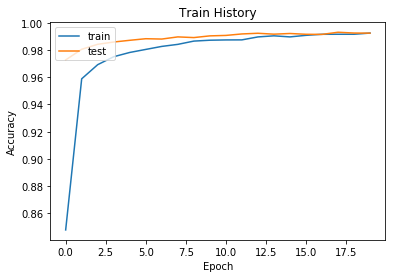

In [8]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
  plt.plot(train_history.history[train_acc])
  plt.plot(train_history.history[test_acc])
  plt.title('Train History')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

show_train_history('acc','val_acc')

In [9]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 87us/step


0.9935

In [10]:
prediction=model.predict_classes(x_Test4D_normalize)

prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
     ax=plt.subplot(5,5, 1+i)
     ax.imshow(images[idx], cmap='binary')
     ax.set_title("label=" +str(labels[idx])+",predict="+str(prediction[idx]),fontsize=10)
     ax.set_xticks([]);ax.set_yticks([])
     idx+=1
    plt.show()

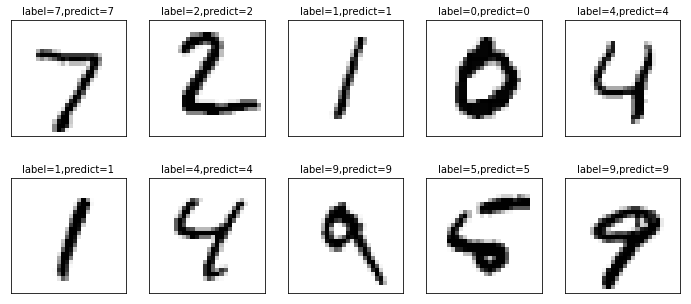

In [13]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [14]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1130,2,0,0,1,0,1,1,0
2,1,0,1029,0,0,0,0,2,0,0
3,0,0,1,1002,0,4,0,0,2,1
4,0,0,0,0,976,0,1,0,2,3
5,0,0,0,4,0,886,1,0,0,1
6,2,2,0,0,2,1,951,0,0,0
7,0,2,4,0,1,0,0,1017,1,3
8,1,0,2,2,0,1,0,0,966,2


In [15]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
2810,5,3
5937,5,3
